In [36]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from ast import literal_eval

from urllib.parse import urlparse

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances, euclidean_distances

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# data = pd.read_csv('dataset/full_dataset.csv')
data = pd.read_csv('../work/dataset/full_dataset.csv')

In [3]:
data.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231142 entries, 0 to 2231141
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   title        object
 2   ingredients  object
 3   directions   object
 4   link         object
 5   source       object
 6   NER          object
dtypes: int64(1), object(6)
memory usage: 119.2+ MB


In [5]:
data.ingredients[0]

'["1 c. firmly packed brown sugar", "1/2 c. evaporated milk", "1/2 tsp. vanilla", "1/2 c. broken nuts (pecans)", "2 Tbsp. butter or margarine", "3 1/2 c. bite size shredded rice biscuits"]'

In [6]:
data.directions[0]

'["In a heavy 2-quart saucepan, mix brown sugar, nuts, evaporated milk and butter or margarine.", "Stir over medium heat until mixture bubbles all over top.", "Boil and stir 5 minutes more. Take off heat.", "Stir in vanilla and cereal; mix well.", "Using 2 teaspoons, drop and shape into 30 clusters on wax paper.", "Let stand until firm, about 30 minutes."]'

In [7]:
data.NER[0]

'["brown sugar", "milk", "vanilla", "nuts", "butter", "bite size shredded rice biscuits"]'

In [8]:
data.source.unique()

array(['Gathered', 'Recipes1M'], dtype=object)

In [9]:
data = data.loc[data['source'] == 'Gathered']

In [10]:
data.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [11]:
data.source.unique()

array(['Gathered'], dtype=object)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1643098 entries, 0 to 1643097
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Unnamed: 0   1643098 non-null  int64 
 1   title        1643098 non-null  object
 2   ingredients  1643098 non-null  object
 3   directions   1643098 non-null  object
 4   link         1643098 non-null  object
 5   source       1643098 non-null  object
 6   NER          1643098 non-null  object
dtypes: int64(1), object(6)
memory usage: 100.3+ MB


In [13]:
toy_data = data.iloc[:5]
toy_data

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [14]:
toy_data = toy_data[['title','source']]
toy_data

,title,source
0,No-Bake Nut Cookies,Gathered
1,Jewell Ball'S Chicken,Gathered
2,Creamy Corn,Gathered
3,Chicken Funny,Gathered
4,Reeses Cups(Candy),Gathered


In [15]:
G = nx.Graph()

In [16]:
G = nx.from_pandas_edgelist(toy_data, 'title', 'source')

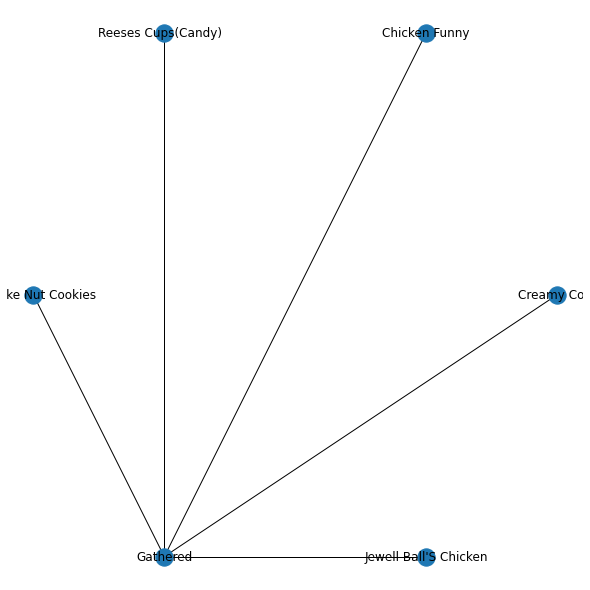

In [17]:
plt.figure(figsize=(8,8))
nx.draw_shell(G, with_labels=True)

In [18]:
def literal_return(val):
    try:
        return literal_eval(val)
    except (ValueError, SyntaxError) as e:
        return val

def df_str_to_literal(df, column_name):
    df[column_name] = df[column_name].apply(literal_return)
    return df[column_name]

In [19]:
toy_data = data.iloc[:5]
toy_data

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [20]:
toy_data.ingredients[0]

'["1 c. firmly packed brown sugar", "1/2 c. evaporated milk", "1/2 tsp. vanilla", "1/2 c. broken nuts (pecans)", "2 Tbsp. butter or margarine", "3 1/2 c. bite size shredded rice biscuits"]'

In [21]:
def clean_df(df, columns_list):
    for col in columns_list:
        df[col] = df_str_to_literal(df, col)
    return None

In [22]:
clean_df(toy_data, ['ingredients', 'directions', 'NER'])

<ipython-input-18-01ee18cf57f3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(literal_return)
<ipython-input-21-cde3aa105d86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df_str_to_literal(df, col)


In [23]:
toy_data.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[1 c. firmly packed brown sugar, 1/2 c. evapor...","[In a heavy 2-quart saucepan, mix brown sugar,...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[brown sugar, milk, vanilla, nuts, butter, bit..."
1,1,Jewell Ball'S Chicken,"[1 small jar chipped beef, cut up, 4 boned chi...","[Place chipped beef on bottom of baking dish.,...",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[beef, chicken breasts, cream of mushroom soup..."
2,2,Creamy Corn,"[2 (16 oz.) pkg. frozen corn, 1 (8 oz.) pkg. c...","[In a slow cooker, combine all ingredients. Co...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[frozen corn, cream cheese, butter, garlic pow..."
3,3,Chicken Funny,"[1 large whole chicken, 2 (10 1/2 oz.) cans ch...","[Boil and debone chicken., Put bite size piece...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[chicken, chicken gravy, cream of mushroom sou..."
4,4,Reeses Cups(Candy),"[1 c. peanut butter, 3/4 c. graham cracker cru...",[Combine first four ingredients and press in 1...,www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[peanut butter, graham cracker crumbs, butter,..."


In [24]:
toy_data.ingredients[0]

['1 c. firmly packed brown sugar',
 '1/2 c. evaporated milk',
 '1/2 tsp. vanilla',
 '1/2 c. broken nuts (pecans)',
 '2 Tbsp. butter or margarine',
 '3 1/2 c. bite size shredded rice biscuits']

In [25]:
toy_data.directions[0]

['In a heavy 2-quart saucepan, mix brown sugar, nuts, evaporated milk and butter or margarine.',
 'Stir over medium heat until mixture bubbles all over top.',
 'Boil and stir 5 minutes more. Take off heat.',
 'Stir in vanilla and cereal; mix well.',
 'Using 2 teaspoons, drop and shape into 30 clusters on wax paper.',
 'Let stand until firm, about 30 minutes.']

In [26]:
toy_data.NER[0]

['brown sugar',
 'milk',
 'vanilla',
 'nuts',
 'butter',
 'bite size shredded rice biscuits']

In [27]:
toy_data.link[0]

'www.cookbooks.com/Recipe-Details.aspx?id=44874'

In [28]:
# path = urlparse(toy_data.link[0]).path
# path

In [29]:
# site = path.split('/')[0]
# site

In [30]:
def parse_link(link):
    path = urlparse(link).path
    site = path.split('/')[0]
    return site

def df_link_to_site(df, column_name, new_column_name):
    df[new_column_name] = df[column_name].apply(parse_link)
    return df[new_column_name]

In [31]:
toy_data['site'] = df_link_to_site(toy_data, 'link', 'site')
toy_data.head()

<ipython-input-30-ee72dffdbc10>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name] = df[column_name].apply(parse_link)
<ipython-input-31-633740bd15d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toy_data['site'] = df_link_to_site(toy_data, 'link', 'site')


,Unnamed: 0,title,ingredients,directions,link,source,NER,site
0,0,No-Bake Nut Cookies,"[1 c. firmly packed brown sugar, 1/2 c. evapor...","[In a heavy 2-quart saucepan, mix brown sugar,...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[brown sugar, milk, vanilla, nuts, butter, bit...",www.cookbooks.com
1,1,Jewell Ball'S Chicken,"[1 small jar chipped beef, cut up, 4 boned chi...","[Place chipped beef on bottom of baking dish.,...",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[beef, chicken breasts, cream of mushroom soup...",www.cookbooks.com
2,2,Creamy Corn,"[2 (16 oz.) pkg. frozen corn, 1 (8 oz.) pkg. c...","[In a slow cooker, combine all ingredients. Co...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[frozen corn, cream cheese, butter, garlic pow...",www.cookbooks.com
3,3,Chicken Funny,"[1 large whole chicken, 2 (10 1/2 oz.) cans ch...","[Boil and debone chicken., Put bite size piece...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[chicken, chicken gravy, cream of mushroom sou...",www.cookbooks.com
4,4,Reeses Cups(Candy),"[1 c. peanut butter, 3/4 c. graham cracker cru...",[Combine first four ingredients and press in 1...,www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[peanut butter, graham cracker crumbs, butter,...",www.cookbooks.com


In [32]:
toy_data.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER,site
0,0,No-Bake Nut Cookies,"[1 c. firmly packed brown sugar, 1/2 c. evapor...","[In a heavy 2-quart saucepan, mix brown sugar,...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[brown sugar, milk, vanilla, nuts, butter, bit...",www.cookbooks.com
1,1,Jewell Ball'S Chicken,"[1 small jar chipped beef, cut up, 4 boned chi...","[Place chipped beef on bottom of baking dish.,...",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[beef, chicken breasts, cream of mushroom soup...",www.cookbooks.com
2,2,Creamy Corn,"[2 (16 oz.) pkg. frozen corn, 1 (8 oz.) pkg. c...","[In a slow cooker, combine all ingredients. Co...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[frozen corn, cream cheese, butter, garlic pow...",www.cookbooks.com
3,3,Chicken Funny,"[1 large whole chicken, 2 (10 1/2 oz.) cans ch...","[Boil and debone chicken., Put bite size piece...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[chicken, chicken gravy, cream of mushroom sou...",www.cookbooks.com
4,4,Reeses Cups(Candy),"[1 c. peanut butter, 3/4 c. graham cracker cru...",[Combine first four ingredients and press in 1...,www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[peanut butter, graham cracker crumbs, butter,...",www.cookbooks.com


In [33]:
toy_data['bag_of_words'] = ''
columns_list = ['ingredients', 'directions', 'site']
for col in columns_list:
    if col != 'site':
        toy_data['bag_of_words'] += toy_data[col].apply(' '.join) + ' '
    else:
        toy_data['bag_of_words'] += toy_data[col]
toy_data.head()

<ipython-input-33-4592fa420d1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toy_data['bag_of_words'] = ''
<ipython-input-33-4592fa420d1f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toy_data['bag_of_words'] += toy_data[col].apply(' '.join) + ' '
<ipython-input-33-4592fa420d1f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,Unnamed: 0,title,ingredients,directions,link,source,NER,site,bag_of_words
0,0,No-Bake Nut Cookies,"[1 c. firmly packed brown sugar, 1/2 c. evapor...","[In a heavy 2-quart saucepan, mix brown sugar,...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[brown sugar, milk, vanilla, nuts, butter, bit...",www.cookbooks.com,1 c. firmly packed brown sugar 1/2 c. evaporat...
1,1,Jewell Ball'S Chicken,"[1 small jar chipped beef, cut up, 4 boned chi...","[Place chipped beef on bottom of baking dish.,...",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[beef, chicken breasts, cream of mushroom soup...",www.cookbooks.com,"1 small jar chipped beef, cut up 4 boned chick..."
2,2,Creamy Corn,"[2 (16 oz.) pkg. frozen corn, 1 (8 oz.) pkg. c...","[In a slow cooker, combine all ingredients. Co...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[frozen corn, cream cheese, butter, garlic pow...",www.cookbooks.com,2 (16 oz.) pkg. frozen corn 1 (8 oz.) pkg. cre...
3,3,Chicken Funny,"[1 large whole chicken, 2 (10 1/2 oz.) cans ch...","[Boil and debone chicken., Put bite size piece...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[chicken, chicken gravy, cream of mushroom sou...",www.cookbooks.com,1 large whole chicken 2 (10 1/2 oz.) cans chic...
4,4,Reeses Cups(Candy),"[1 c. peanut butter, 3/4 c. graham cracker cru...",[Combine first four ingredients and press in 1...,www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[peanut butter, graham cracker crumbs, butter,...",www.cookbooks.com,1 c. peanut butter 3/4 c. graham cracker crumb...


In [34]:
toy_data['bag_of_words'][0]

'1 c. firmly packed brown sugar 1/2 c. evaporated milk 1/2 tsp. vanilla 1/2 c. broken nuts (pecans) 2 Tbsp. butter or margarine 3 1/2 c. bite size shredded rice biscuits In a heavy 2-quart saucepan, mix brown sugar, nuts, evaporated milk and butter or margarine. Stir over medium heat until mixture bubbles all over top. Boil and stir 5 minutes more. Take off heat. Stir in vanilla and cereal; mix well. Using 2 teaspoons, drop and shape into 30 clusters on wax paper. Let stand until firm, about 30 minutes. www.cookbooks.com'